# **Importing libraries and Loading the dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Parkinson dataset/Parkinson’s Disease Data Set (Numerical)/parkinsons.csv')

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


**Checking Missing Value**

In [ ]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**Drop Useless columns**

In [ ]:
df.drop(columns="name", inplace=True)

**Correlation between parameters**

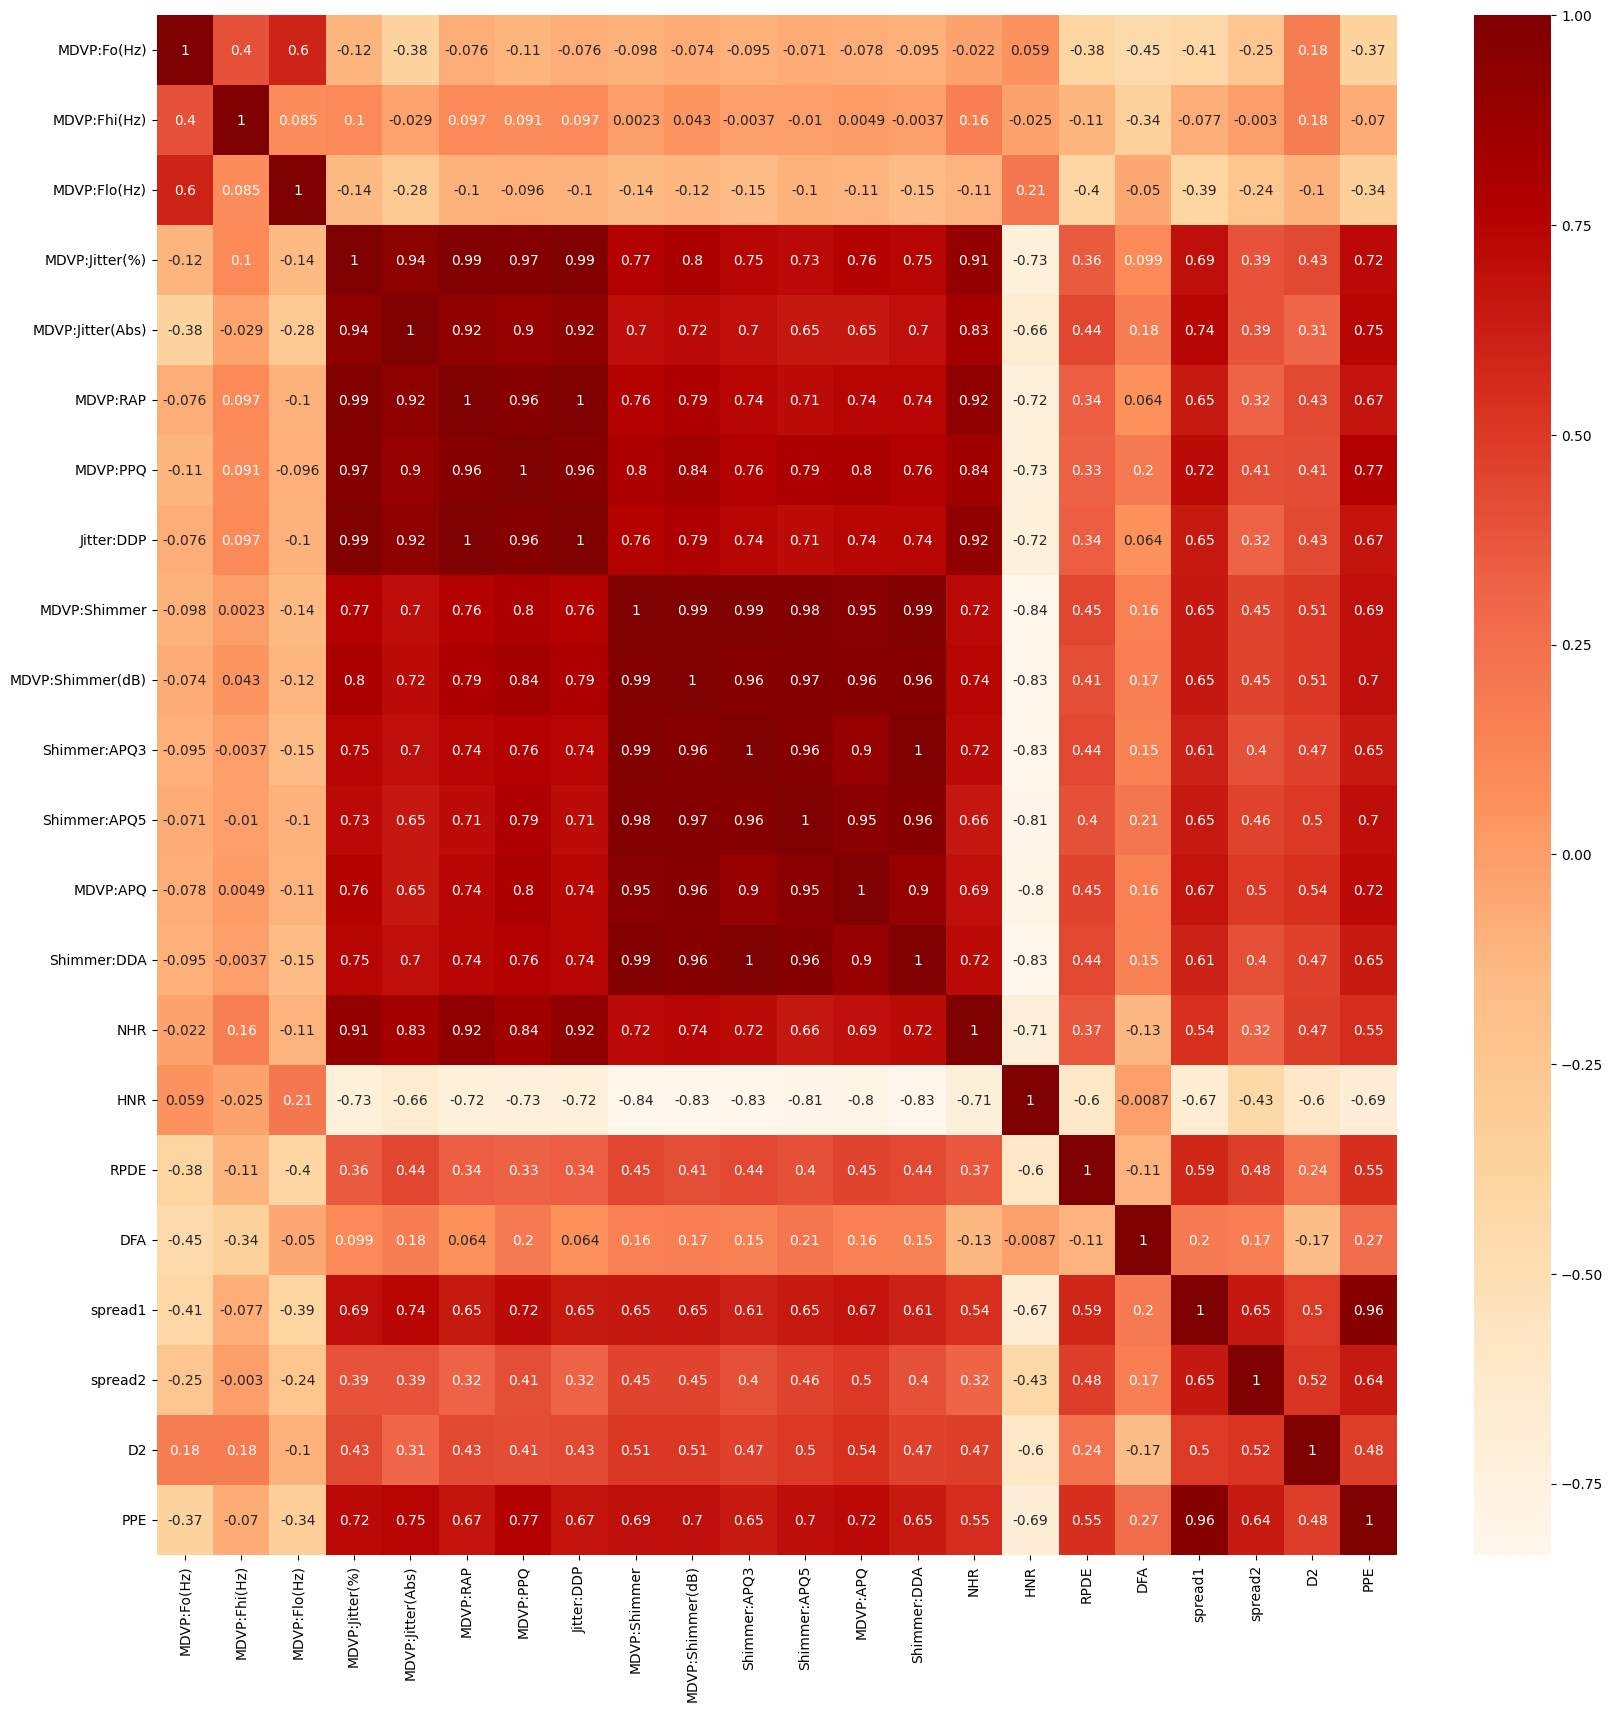

In [ ]:
correl=df.drop(columns='status').corr()
plt.figure(figsize=(20,20))
sns.heatmap(correl,annot=True,cmap='OrRd')
plt.show()

# **Spiltting the dataset**

Seperating features and labels

In [ ]:
X = df.drop(columns="status")
Y = df["status"]

Scale down given features between -1 to 1

In [ ]:
scaler = MinMaxScaler((-1,1))
X = scaler.fit_transform(X)

Split given data into training and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(156, 22)
(39, 22)


# **Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
pred1 = lr_model.predict(X_test)
accuracy_score_1 = accuracy_score(Y_test, pred1)
precision_score_1 = precision_score(Y_test, pred1)
recall_score_1 = recall_score(Y_test, pred1)
f1_score_1 = f1_score(Y_test, pred1)
print(f'Accuracy Score: {accuracy_score_1}')
print(f'Precision Score: {precision_score_1}')
print(f'Recall Score: {recall_score_1}')
print(f'F1 Score: {f1_score_1}')

Accuracy Score: 0.8974358974358975
Precision Score: 0.8888888888888888
Recall Score: 1.0
F1 Score: 0.9411764705882353


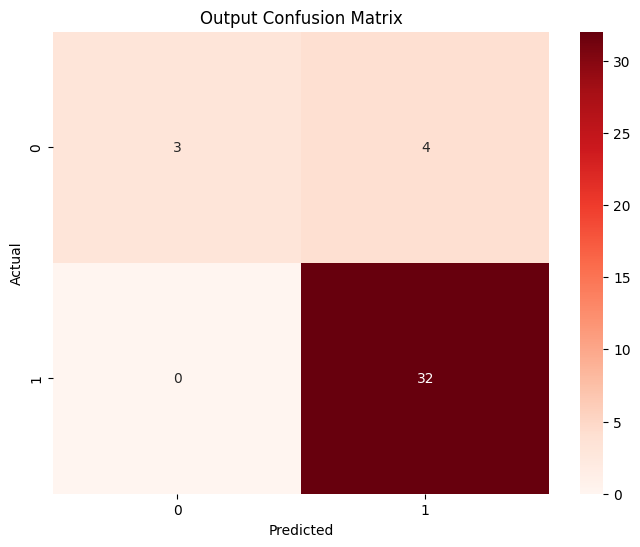

In [ ]:
cm=confusion_matrix(Y_test,pred1)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix");

# **SVM Model**

**SVC** - Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, Y_train)

SVC()

In [ ]:
pred2 = svm_model.predict(X_test)
accuracy_score_2 = accuracy_score(Y_test, pred2)
precision_score_2 = precision_score(Y_test, pred2)
recall_score_2 = recall_score(Y_test, pred2)
f1_score_2 = f1_score(Y_test, pred2)
print(f'Accuracy Score: {accuracy_score_2}')
print(f'Precision Score: {precision_score_2}')
print(f'Recall Score: {recall_score_2}')
print(f'F1 Score: {f1_score_2}')

Accuracy Score: 0.8974358974358975
Precision Score: 0.8888888888888888
Recall Score: 1.0
F1 Score: 0.9411764705882353


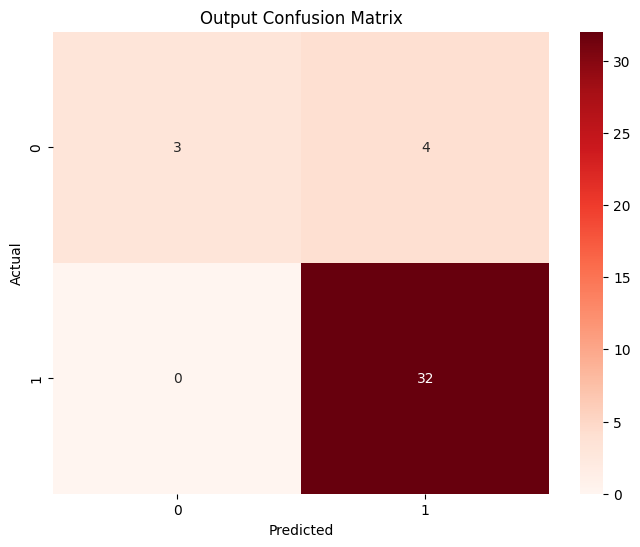

In [ ]:
cm=confusion_matrix(Y_test,pred2)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix");

# **Simple Neural Network model**

Loading TensorFlow library

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

Implementing a simple Neural Network model

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
5/5 [==============================] - 1s 45ms/step - loss: 0.7874 - accuracy: 0.4857 - val_loss: 0.6461 - val_accuracy: 0.7500
Epoch 2/10
5/5 [==============================] - 0s 10ms/step - loss: 0.6791 - accuracy: 0.6000 - val_loss: 0.5469 - val_accuracy: 0.7500
Epoch 3/10
5/5 [==============================] - 0s 9ms/step - loss: 0.5995 - accuracy: 0.6714 - val_loss: 0.5066 - val_accuracy: 0.8750
Epoch 4/10
5/5 [==============================] - 0s 9ms/step - loss: 0.5514 - accuracy: 0.7000 - val_loss: 0.4887 - val_accuracy: 0.8125
Epoch 5/10
5/5 [==============================] - 0s 9ms/step - loss: 0.5108 - accuracy: 0.7214 - val_loss: 0.4742 - val_accuracy: 0.7500
Epoch 6/10
5/5 [==============================] - 0s 9ms/step - loss: 0.4828 - accuracy: 0.7286 - val_loss: 0.4630 - val_accuracy: 0.7500
Epoch 7/10
5/5 [==============================] - 0s 9ms/step - loss: 0.4602 - accuracy: 0.7429 - val_loss: 0.4498 - val_accuracy: 0.7500
Epoch 8/10
5/5 [================

In [ ]:
Y_pred_prob = model.predict(X_test_scaled)
Y_pred = (Y_pred_prob > 0.5).astype(int)

2/2 [==============================] - 0s 5ms/step


In [ ]:
print(f'Accuracy Score: {accuracy_score(Y_test, Y_pred)}')
print(f'Precision Score: {precision_score(Y_test, Y_pred)}')
print(f'Recall Score: {recall_score(Y_test, Y_pred)}')
print(f'F1 Score: {f1_score(Y_test, Y_pred)}')

Accuracy Score: 0.7948717948717948
Precision Score: 0.875
Recall Score: 0.875
F1 Score: 0.875


# **More Refined Neural Network model**

In [ ]:
Y_train_one_hot = to_categorical(Y_train, num_classes=2)
Y_test_one_hot = to_categorical(Y_test, num_classes=2)

ANN_model = Sequential()
ANN_model.add(Flatten(input_shape=(X_train.shape[1],)))
ANN_model.add(Dense(100, activation='relu'))
ANN_model.add(Dense(100, activation='relu'))
ANN_model.add(Dense(2, activation='sigmoid'))
ANN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

ANN_model.fit(X_train, Y_train_one_hot, epochs=20)

Epoch 1/20
5/5 [==============================] - 1s 4ms/step - loss: 0.6170 - accuracy: 0.7692
Epoch 2/20
5/5 [==============================] - 0s 3ms/step - loss: 0.5335 - accuracy: 0.7436
Epoch 3/20
5/5 [==============================] - 0s 5ms/step - loss: 0.4790 - accuracy: 0.7949
Epoch 4/20
5/5 [==============================] - 0s 4ms/step - loss: 0.4349 - accuracy: 0.8269
Epoch 5/20
5/5 [==============================] - 0s 4ms/step - loss: 0.3953 - accuracy: 0.8397
Epoch 6/20
5/5 [==============================] - 0s 4ms/step - loss: 0.3672 - accuracy: 0.8526
Epoch 7/20
5/5 [==============================] - 0s 4ms/step - loss: 0.3478 - accuracy: 0.8590
Epoch 8/20
5/5 [==============================] - 0s 4ms/step - loss: 0.3309 - accuracy: 0.8526
Epoch 9/20
5/5 [==============================] - 0s 4ms/step - loss: 0.3171 - accuracy: 0.8590
Epoch 10/20
5/5 [==============================] - 0s 4ms/step - loss: 0.3077 - accuracy: 0.8654
Epoch 11/20
5/5 [======================

In [ ]:
Y_pred_prob = ANN_model.predict(X_test)
Y_pred = (Y_pred_prob > 0.5).astype(int)

2/2 [==============================] - 0s 9ms/step


In [ ]:
print(f'Accuracy Score: {accuracy_score(Y_test_one_hot.argmax(axis=1), Y_pred.argmax(axis=1))}')
print(f'Precision Score: {precision_score(Y_test_one_hot.argmax(axis=1), Y_pred.argmax(axis=1))}')
print(f'Recall Score: {recall_score(Y_test_one_hot.argmax(axis=1), Y_pred.argmax(axis=1))}')
print(f'F1 Score: {f1_score(Y_test_one_hot.argmax(axis=1), Y_pred.argmax(axis=1))}')

Accuracy Score: 0.8461538461538461
Precision Score: 0.8823529411764706
Recall Score: 0.9375
F1 Score: 0.9090909090909091


# **CNN (Convolutional Neural Network)**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1, 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1, 1)

cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train_scaled.shape[1], 1, 1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.fit(X_train_reshaped, Y_train, epochs=10, batch_size=32, validation_split=0.1)

Y_pred_prob = cnn_model.predict(X_test_reshaped)
Y_pred = (Y_pred_prob > 0.5).astype(int)

print(f'Accuracy Score: {accuracy_score(Y_test_one_hot.argmax(axis=1), Y_pred.argmax(axis=1))}')
print(f'Precision Score: {precision_score(Y_test_one_hot.argmax(axis=1), Y_pred.argmax(axis=1))}')
print(f'Recall Score: {recall_score(Y_test_one_hot.argmax(axis=1), Y_pred.argmax(axis=1))}')
print(f'F1 Score: {f1_score(Y_test_one_hot.argmax(axis=1), Y_pred.argmax(axis=1))}')

ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d. Consider increasing the input size. Received input shape [None, 22, 1, 1] which would produce output shape with a zero or negative value in a dimension.